In [1]:
import os

# set current file as the working directory
# os.chdir(os.path.dirname(os.path.abspath(__file__)))

from scipy import stats
from model import Model
import numpy as np
from keras.utils import to_categorical

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import argparse
import pickle
from helper.stats import stats_dataset
from helper.utils import pickle_store_dataset,load_from_pickle
import time 
import tensorflow as tf

2024-03-19 04:26:31.600937: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-03-19 04:26:32.769020: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
%pip freeze

/bin/bash: /home/sukhmeet/miniconda3/envs/tf/lib/python3.9/site-packages/cv2/../../../../lib/libtinfo.so.6: no version information available (required by /bin/bash)
absl-py==1.4.0
aggdraw==1.3.18
ann-visualizer==2.5
anyio==4.3.0
argon2-cffi==23.1.0
argon2-cffi-bindings==21.2.0
arrow==1.3.0
asttokens==2.2.1
astunparse==1.6.3
async-lru==2.0.4
attrs==23.1.0
autoreload==0.1.2
Babel==2.14.0
backcall==0.2.0
beautifulsoup4==4.12.3
bleach==6.1.0
cachetools==5.3.1
certifi==2023.7.22
cffi==1.16.0
charset-normalizer==3.2.0
click==8.1.7
comm==0.1.4
contourpy==1.1.0
cycler==0.11.0
debugpy==1.6.7.post1
decorator==5.1.1
defusedxml==0.7.1
dm-tree==0.1.8
ember==0.1.0
exceptiongroup==1.2.0
executing==1.2.0
fastjsonschema==2.18.1
flatbuffers==23.5.26
fonttools==4.42.1
fqdn==1.5.1
gast==0.4.0
google-auth==2.22.0
google-auth-oauthlib==1.2.0
google-pasta==0.2.0
graphviz==0.20.1
grpcio==1.57.0
h11==0.14.0
h5py==3.9.0
httpcore==1.0.4
httpx==0.27.0
idna==3.4
imbalanced-learn==0.11.0
imblearn==0.0
importlib-met

In [2]:
train_dir = '../../../../dataset/malnet/malnet-images-tiny/train'
test_dir = '../../../../dataset/malnet/malnet-images-tiny/test'
val_dir =  '../../../../dataset/malnet/malnet-images-tiny/val'
model_dir = './models'
results_dir = './results'

In [3]:

start_time = time.time()
train_data, train_labels, val_data, val_labels, test_data, test_labels = load_from_pickle()
end_time = time.time()


print(type(val_labels),type(val_data))
print("Time taken to load data:", end_time - start_time)

original_train_labels = train_labels
original_test_labels = test_labels
original_val_labels = val_labels


# to categorical
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)
val_labels = to_categorical(val_labels)

print("10 labels:", train_labels[:10])

print("Train data shape:", train_data.shape)
print("Train labels shape:", train_labels.shape)
print("Test data shape:", test_data.shape)
print("Test labels shape:", test_labels.shape)
print("Test labels shape:", test_labels[0].shape)
print("Test labels shape:", test_labels[0])

# input("Press Enter to continue...")

num_classes = train_labels.shape[1]
print("Number of classes:", np.unique(train_labels))
print("Number of classes:", np.unique(train_labels).shape)
print("Shape of train data:", train_data.shape)
print("Shape of train data:", train_data[0].shape)
print("Labels:", train_labels[0].shape,num_classes)

    


<class 'numpy.ndarray'> <class 'numpy.ndarray'>
Time taken to load data: 50.901487588882446
10 labels: [[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 1. 0.

In [4]:
model = Model(input_shape=train_data[0].shape, num_classes=num_classes)
# tf.keras.utils.plot_model(model.model, show_shapes=True,show_layer_names=False)


In [5]:
for layer in model.model.layers:
    print(layer,layer.trainable)

<keras.src.engine.input_layer.InputLayer object at 0x7fc5d6a6c9a0> False
<keras.src.layers.reshaping.zero_padding2d.ZeroPadding2D object at 0x7fc5d5ec32b0> False
<keras.src.layers.convolutional.conv2d.Conv2D object at 0x7fc5d5ec37c0> False
<keras.src.layers.normalization.batch_normalization.BatchNormalization object at 0x7fc5d5ec3cd0> False
<keras.src.layers.core.activation.Activation object at 0x7fc5d5ec3af0> False
<keras.src.layers.reshaping.zero_padding2d.ZeroPadding2D object at 0x7fc5d5e7c0d0> False
<keras.src.layers.pooling.max_pooling2d.MaxPooling2D object at 0x7fc5d5e27880> False
<keras.src.layers.convolutional.conv2d.Conv2D object at 0x7fc5d5e3eaf0> False
<keras.src.layers.normalization.batch_normalization.BatchNormalization object at 0x7fc5d5e3efa0> False
<keras.src.layers.core.activation.Activation object at 0x7fc5d5dd68b0> False
<keras.src.layers.convolutional.conv2d.Conv2D object at 0x7fc5d5dd69a0> False
<keras.src.layers.normalization.batch_normalization.BatchNormalization

In [6]:
history = model.train(train_data, train_labels, num_epochs=30, val_data=(val_data, val_labels))






































Training the model
x_train shape: (61201, 256, 256, 3)
y_train shape: (61201, 43)
x_train[0]: [[[0.         0.         0.42352942]
  [0.         0.         0.40784314]
  [0.         0.         0.3882353 ]
  ...
  [0.         0.         0.        ]
  [0.         0.         0.        ]
  [0.         0.         0.        ]]

 [[0.17254902 0.         0.1764706 ]
  [0.16078432 0.         0.16078432]
  [0.14509805 0.         0.13333334]
  ...
  [0.         0.         0.        ]
  [0.         0.         0.        ]
  [0.00392157 0.         0.        ]]

 [[0.20392157 0.         0.        ]
  [0.19607843 0.         0.        ]
  [0.18431373 0.         0.        ]
  ...
  [0.         0.         0.        ]
  [0.         0.         0.        ]
  [0.00392157 0.         0.        ]]

 ...

 [[0.         0.0627451  0.        ]
  [0.         0.05882353 0.        ]
  [0.         0.10588235 0.        ]
  ...
  [0.         0.03137255 0.        ]
  [0.         0.         0.        ]
  [0.         0.   

                                                                                                  
 conv3_block4_3_conv (Conv2  (None, 32, 32, 512)          66048     ['conv3_block4_2_relu[0][0]'] 
 D)                                                                                               
                                                                                                  
 conv3_block4_3_bn (BatchNo  (None, 32, 32, 512)          2048      ['conv3_block4_3_conv[0][0]'] 
 rmalization)                                                                                     
                                                                                                  
 conv3_block4_add (Add)      (None, 32, 32, 512)          0         ['conv3_block3_out[0][0]',    
                                                                     'conv3_block4_3_bn[0][0]']   
                                                                                                  
 conv3_blo

In [ ]:
model.load(model_dir)

NameError: name 'model' is not defined

In [ ]:
print("Model loaded")
print("Test data shape:", test_data.shape)
print("Test labels shape:", test_labels.shape)
print("Test data shape:", test_labels[:10])

Model loaded


NameError: name 'test_data' is not defined

In [ ]:
y_pred = model.predict(test_data)

30/30 [==============================] - 1s 32ms/step


In [ ]:
accuracy, confusion_matrix, classification_report = model.evaluate(x_test=test_data,y_test=original_test_labels,verbose=1)

30/30 [==============================] - 1s 32ms/step
Accuracy: 0.9187165775401069
Confusion matrix:
 [[ 25   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0]
 [  0  23   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   2   0   0   0]
 [  0   0 125   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0]
 [  0   0   0 100   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0]
 [  0   0   0   0  25   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0  25]
 [  0   0   0   0   0   0  12   5   0   0   0   0   0   0   0   0   0   0
    0   0   2   6   0   0   0]
 [  0   0   0   0   0   0   6  17   0   0   0   0   0   0   0   0   0   0
    0   0   0   2   0   0   0]
 [  0   0   0   0   0   0   0   0  25   0   0   0   0   0 

/home/sukhmeet/miniconda3/envs/tf/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/sukhmeet/miniconda3/envs/tf/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/sukhmeet/miniconda3/envs/tf/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result)

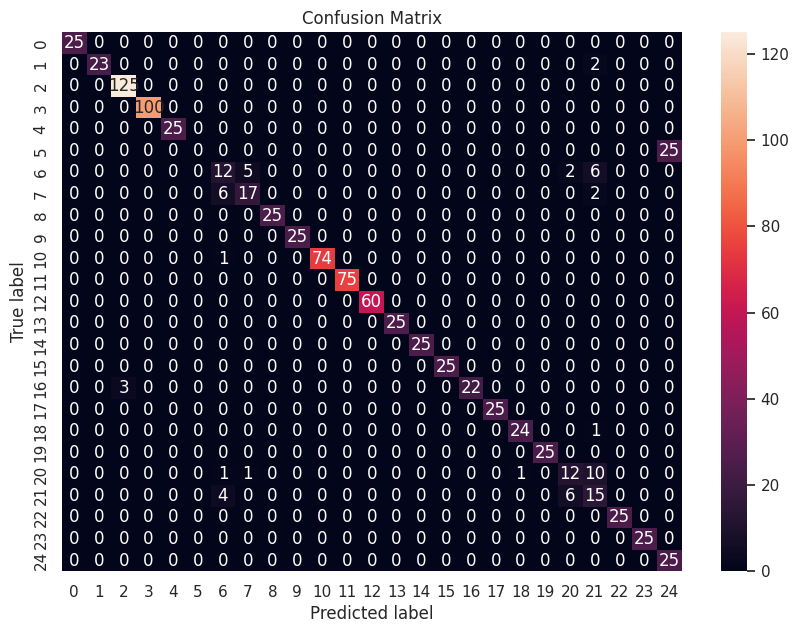

In [ ]:
# def plot_confusion_matrix(y_true, y_pred,title, labels=[0,1],save = True):
  # cm = confusion_matrix(y_true, y_pred, labels=labels)
  # df_cm = pd.DataFrame(cm, index=labels, columns=labels)
  # plt.figure(figsize=(10, 7))
  # sns.heatmap(df_cm, annot=True, fmt='g')
  # # increase font size
  # sns.set_theme(font_scale=2)
  # plt.title(title)
  # plt.ylabel('True label')
  # plt.xlabel('Predicted label')
  # plt.show()
  # return

def plot_confusion_matrix(y_true, y_pred, confusion_matrix, title, labels=[0,1],save = True):
  import matplotlib.pyplot as plt
  import seaborn as sns
  import pandas as pd
  df_cm = pd.DataFrame(confusion_matrix, index=labels, columns=labels)
  plt.figure(figsize=(10, 7))
  sns.heatmap(df_cm, annot=True, fmt='g')
  # increase font size
  # sns.set_theme(font_scale=1)
  plt.title(title)
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.show()
  return

plot_confusion_matrix(original_test_labels, y_pred,confusion_matrix, "Confusion Matrix", labels=np.unique(original_test_labels),save = True)

In [ ]:
np.unique(original_test_labels)

labels = np.unique(original_test_labels)
print("Labels:", labels)

Labels: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24]


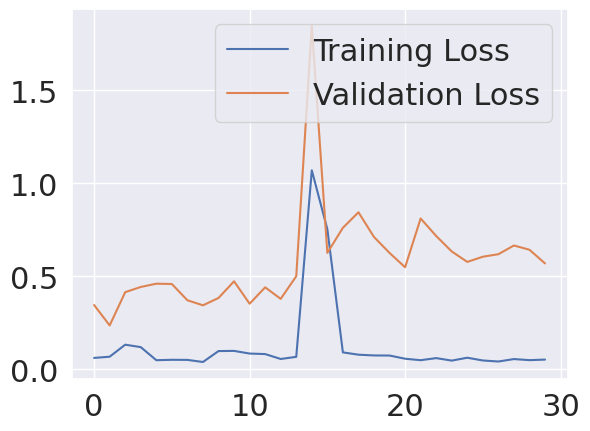

In [ ]:
def plotLossCurve(history,save = True):
  import matplotlib.pyplot as plt

  train_loss = history.history['loss']
  val_loss = history.history['val_loss']

  #plot graph
  # plt.figure().set_figwidth(7)
  plt.plot(train_loss, label='Training Loss')
  plt.plot(val_loss, label='Validation Loss')


  plt.legend()
  plt.show()
  return

plotLossCurve(history,save = True)


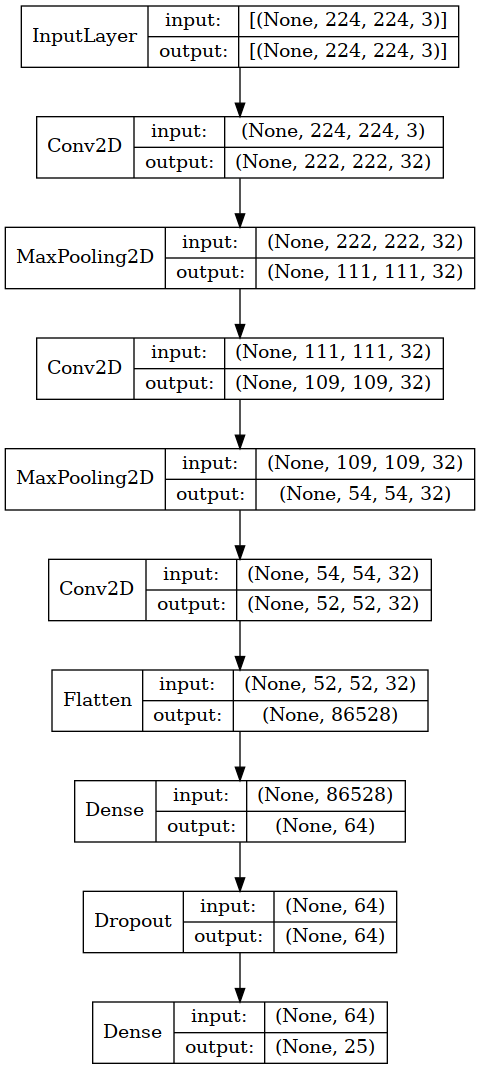